In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df_og = pd.read_csv('Salary_Data.csv')
df_og

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualization

In [3]:
df= df_og.copy()

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.rename({'YearsExperience':'YE',
          'Salary':'SL'},inplace=True,axis=1)
df

,YE,SL
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.shape

(30, 2)

In [7]:
print(df['YE'].kurt())
print(df['SL'].kurt())

-1.0122119403325072
-1.295421086394517


In [8]:
print(df['YE'].skew())
print(df['SL'].skew())

0.37956024064804106
0.35411967922959153


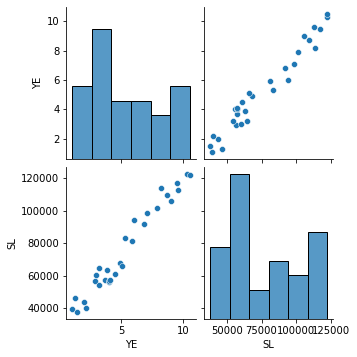

In [9]:
sns.pairplot(df)

<AxesSubplot:>

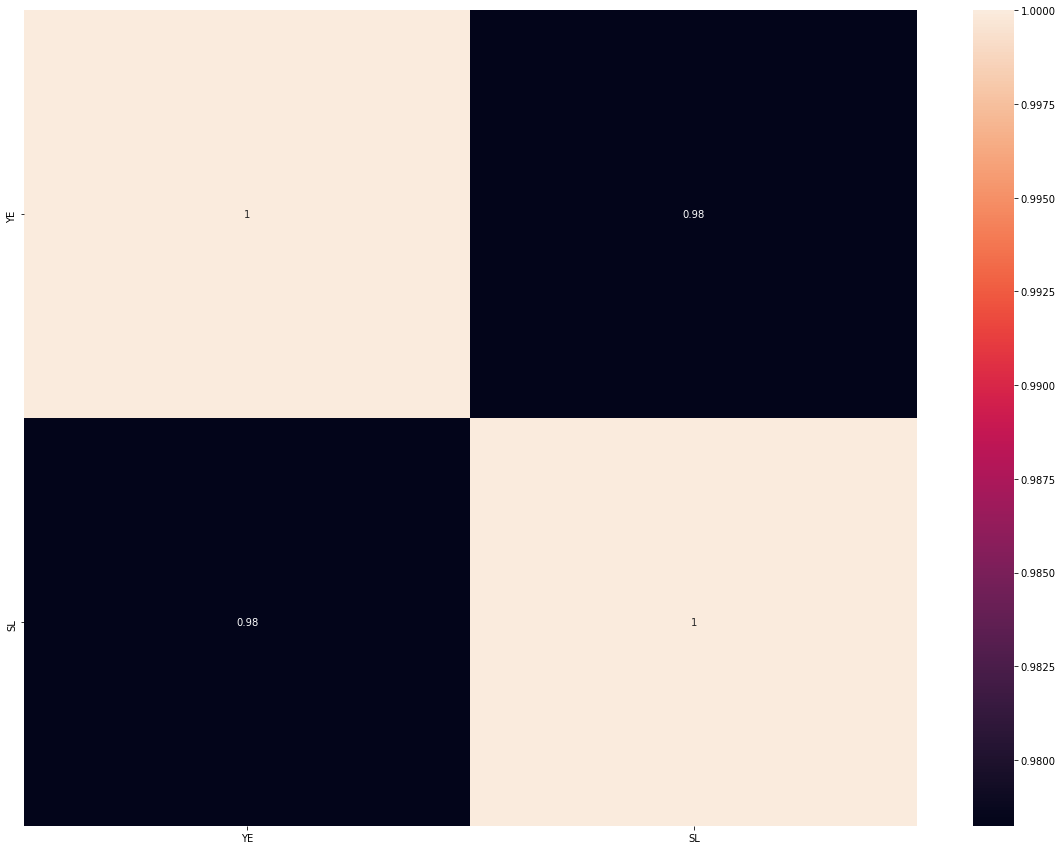

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

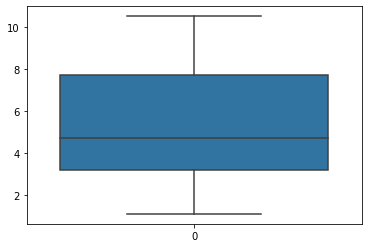

In [11]:
sns.boxplot(data=df['YE'])

<AxesSubplot:>

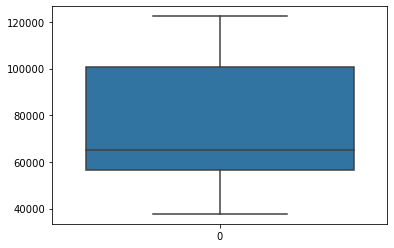

In [12]:
sns.boxplot(data=df['SL'])

In [13]:
#counting duplicate rows
df[df.duplicated()].shape

(0, 2)

<AxesSubplot:>

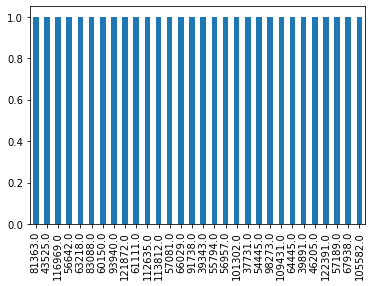

In [14]:
df['SL'].value_counts().plot.bar()

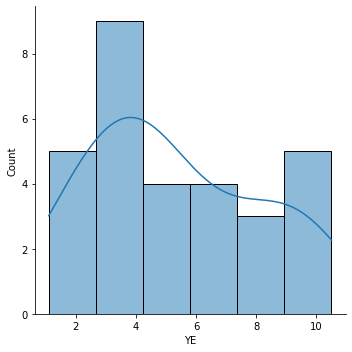

In [15]:
sns.displot(df['YE'],kde=True)

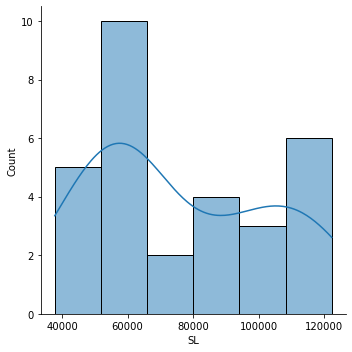

In [16]:
sns.displot(df['SL'],kde=True)

In [17]:
model= smf.ols('YE~SL',data=df).fit()

<AxesSubplot:xlabel='SL', ylabel='YE'>

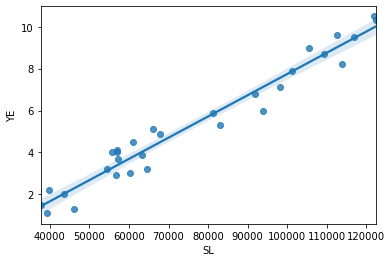

In [18]:
sns.regplot(x='SL',y='YE',data=df)

In [19]:
#Coefficients
model.params

Intercept   -2.383161
SL           0.000101
dtype: float64

In [20]:
#t and p-values
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
SL           24.950094
dtype: float64 
 Intercept    6.300123e-08
SL           1.143068e-20
dtype: float64


In [21]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        10:25:43   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
SL             0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Applying Transformations

##### Power Transformation

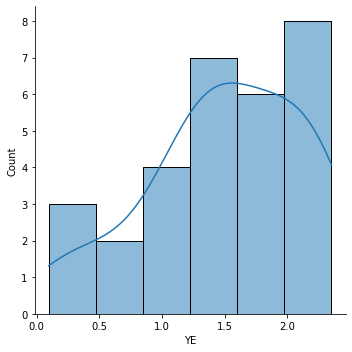

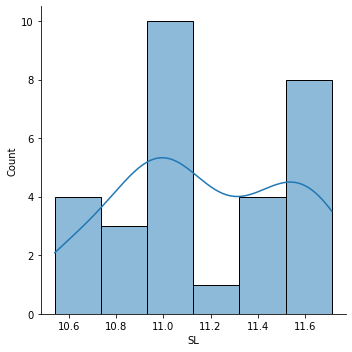

In [23]:
df_pr=df
df_pr['YE']=np.log(df_pr['YE'])
df_pr['SL']= np.log(df_pr['SL'])
sns.displot(df_pr['YE'],kde=True)
sns.displot(df_pr['SL'],kde=True)

In [24]:
model_pr= smf.ols('SL~YE',data=df_pr).fit()

In [25]:
model_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           7.40e-16
Time:                        10:25:44   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
YE             0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### SquareRoot Transformation

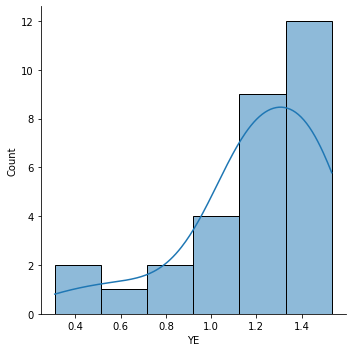

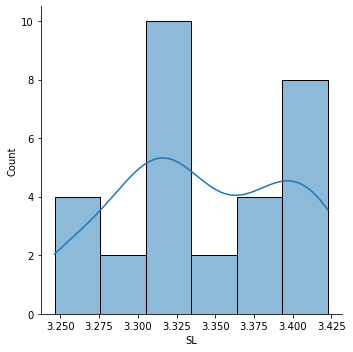

In [26]:
df_sqrt=df

df_sqrt['YE']=np.sqrt(df_sqrt['YE'])
df_sqrt['SL']=np.sqrt(df_sqrt['SL'])
sns.displot(df_sqrt['YE'],kde=True)
sns.displot(df_sqrt['SL'],kde=True)

In [27]:
model_sqrt= smf.ols('SL~YE',data=df_sqrt).fit()

In [28]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.69e-11
Time:                        10:25:45   Log-Likelihood:                 69.495
No. Observations:                  30   AIC:                            -135.0
Df Residuals:                      28   BIC:                            -132.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1491      0.018    170.845      0.000       3.111       3.187
YE             0.1624      0.015     10.808      0.000       0.132       0.193
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.944
Skew:                           0.215   Prob(JB):                        0.624
Kurtosis:                       2.245   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Square Transformtion

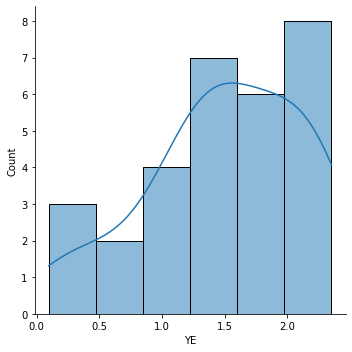

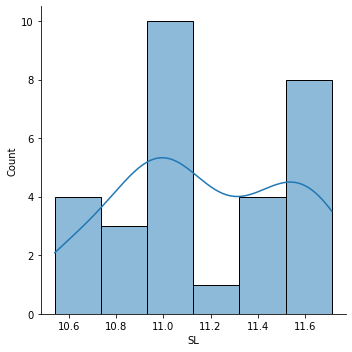

In [29]:
df_sq = df
df_sq['YE'] = np.square(df_sq['YE'])
df_sq['SL'] = np.square(df_sq['SL'])
sns.displot(df_sq['YE'],kde=True)
sns.displot(df_sq['SL'],kde=True)

In [30]:
model_sq= smf.ols('SL~YE',data=df_sq).fit()

In [31]:
model_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           7.40e-16
Time:                        10:25:45   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
YE             0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Log Transformation

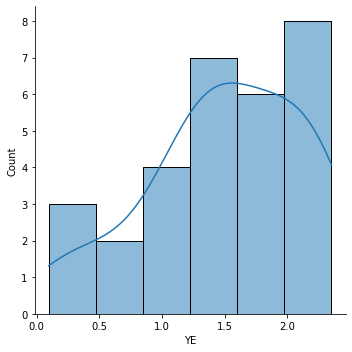

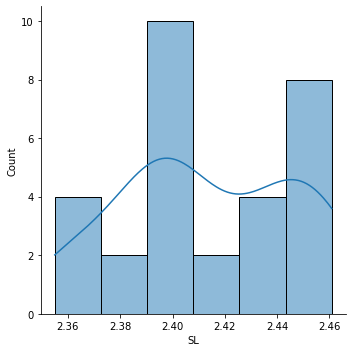

In [32]:
df_lg = df
df_lg['SL']=np.log(df_lg['SL'])
sns.displot(df_lg['YE'],kde=True)
sns.displot(df_lg['SL'],kde=True)

In [33]:
model_lg= smf.ols('SL~YE',data=df_lg).fit()

In [34]:
model_lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     277.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.70e-16
Time:                        10:25:46   Log-Likelihood:                 96.058
No. Observations:                  30   AIC:                            -188.1
Df Residuals:                      28   BIC:                            -185.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3371      0.005    474.377      0.000       2.327       2.347
YE             0.0505      0.003     16.646      0.000       0.044       0.057
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.248
Skew:                           0.093   Prob(JB):                        0.883
Kurtosis:                       2.595   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""